In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('rohit_score.csv')
df

,Match Date,Opponent,Runs,Balls Faced,Strike Rate,Outcome
0,23 March 2025,CSK,0.0,4.0,0.0,catch
1,29 March 2025,GT,8.0,4.0,200.0,bowled
2,31 March 2025,KKR,13.0,12.0,108.0,catch
3,04 April 2025,LSG,NaN,NaN,NaN,NaN
4,07 April 2025,RCB,17.0,9.0,189.0,bowled
5,13 April 2025,DC,18.0,12.0,150.0,lbw
6,17 April 2025,SRH,26.0,16.0,162.0,catch


In [4]:
df.describe()

,Runs,Balls Faced,Strike Rate
count,6.000000,6.000000,6.000000
mean,13.666667,9.500000,134.833333
std,8.959167,4.806246,73.551116
min,0.000000,4.000000,0.000000
25%,9.250000,5.250000,118.500000
50%,15.000000,10.500000,156.000000
75%,17.750000,12.000000,182.250000
max,26.000000,16.000000,200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Match Date   7 non-null      object 
 1   Opponent     7 non-null      object 
 2   Runs         6 non-null      float64
 3   Balls Faced  6 non-null      float64
 4   Strike Rate  6 non-null      float64
 5   Outcome      6 non-null      object 
dtypes: float64(3), object(3)
memory usage: 468.0+ bytes


In [7]:
df.columns

Index(['Match Date', 'Opponent', 'Runs', 'Balls Faced', 'Strike Rate',
       'Outcome'],
      dtype='object')

In [10]:


# rename columns
df.rename(columns = {'Match Date':'Date','Opponent':'opponent','Runs':'runs','Balls Faced':'balls',
                    'Strike Rate':'sr','Outcome':'outcome'}, inplace = True)



In [11]:
df.columns

Index(['Date', 'opponent', 'runs', 'balls', 'sr', 'outcome'], dtype='object')

In [26]:
match_number = [i+1 for i in range(len(df))]

In [27]:
df['matchno'] = match_number

In [28]:
df

,Date,opponent,runs,balls,sr,outcome,Match Number,matchno
0,23 March 2025,CSK,0.0,4.0,0.0,catch,1,1
1,29 March 2025,GT,8.0,4.0,200.0,bowled,2,2
2,31 March 2025,KKR,13.0,12.0,108.0,catch,3,3
3,04 April 2025,LSG,NaN,NaN,NaN,NaN,4,4
4,07 April 2025,RCB,17.0,9.0,189.0,bowled,5,5
5,13 April 2025,DC,18.0,12.0,150.0,lbw,6,6
6,17 April 2025,SRH,26.0,16.0,162.0,catch,7,7


Text(0.5, 1.0, 'Runs scored by rohit sharma')

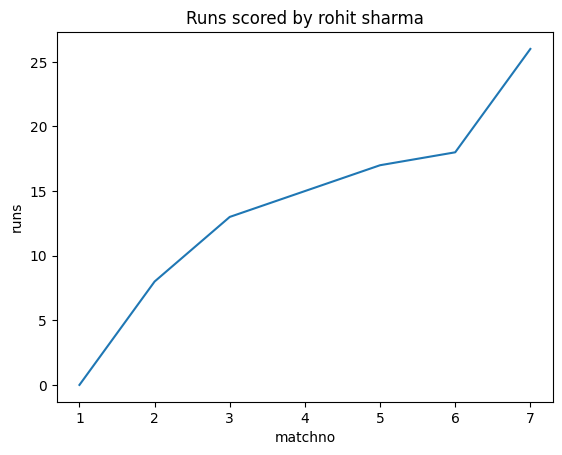

In [30]:
sns.lineplot(x='matchno',y='runs',data=df)
plt.title('Runs scored by rohit sharma')

<Axes: xlabel='outcome', ylabel='count'>

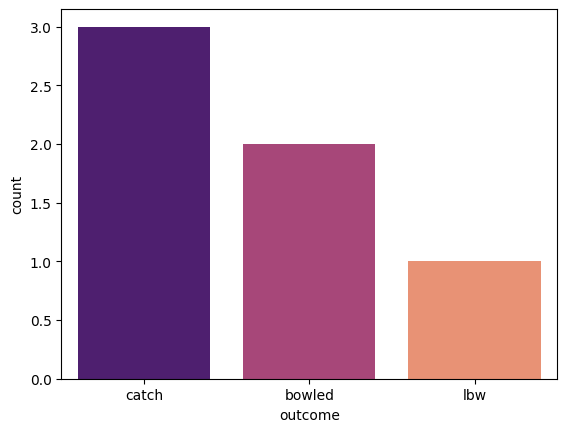

In [32]:
# Let's see how many developing and developed countries there are
sns.countplot(data = df, x = 'outcome',palette='magma')

In [33]:
df

,Date,opponent,runs,balls,sr,outcome,Match Number,matchno
0,23 March 2025,CSK,0.0,4.0,0.0,catch,1,1
1,29 March 2025,GT,8.0,4.0,200.0,bowled,2,2
2,31 March 2025,KKR,13.0,12.0,108.0,catch,3,3
3,04 April 2025,LSG,NaN,NaN,NaN,NaN,4,4
4,07 April 2025,RCB,17.0,9.0,189.0,bowled,5,5
5,13 April 2025,DC,18.0,12.0,150.0,lbw,6,6
6,17 April 2025,SRH,26.0,16.0,162.0,catch,7,7


In [34]:
df = df.drop('Match Number',axis = 1)

In [35]:
df

,Date,opponent,runs,balls,sr,outcome,matchno
0,23 March 2025,CSK,0.0,4.0,0.0,catch,1
1,29 March 2025,GT,8.0,4.0,200.0,bowled,2
2,31 March 2025,KKR,13.0,12.0,108.0,catch,3
3,04 April 2025,LSG,NaN,NaN,NaN,NaN,4
4,07 April 2025,RCB,17.0,9.0,189.0,bowled,5
5,13 April 2025,DC,18.0,12.0,150.0,lbw,6
6,17 April 2025,SRH,26.0,16.0,162.0,catch,7


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['opponent'] = le.fit_transform(df['opponent'])
df['opponent'].unique()

array([0, 2, 3, 4, 5, 1, 6])

In [38]:
le.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [39]:
df

,Date,opponent,runs,balls,sr,outcome,matchno
0,23 March 2025,0,0.0,4.0,0.0,catch,1
1,29 March 2025,2,8.0,4.0,200.0,bowled,2
2,31 March 2025,3,13.0,12.0,108.0,catch,3
3,04 April 2025,4,NaN,NaN,NaN,NaN,4
4,07 April 2025,5,17.0,9.0,189.0,bowled,5
5,13 April 2025,1,18.0,12.0,150.0,lbw,6
6,17 April 2025,6,26.0,16.0,162.0,catch,7


In [40]:
#x is our strong features
X = df[['matchno', 'opponent']]

#y is simply the life expectancy col
y = df["runs"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [45]:
y_train.isna().sum()


np.int64(1)

In [46]:
y_test.isna().sum()

np.int64(0)

In [47]:
y_train.fillna(y_train.mean(), inplace=True)

In [48]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [49]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5, 2)
Shape of X_test:  (2, 2)
Shape of y_train:  (5,)
Shape of y_test:  (2,)


In [50]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  19.419916412193988
r2:  -0.21374477576212425


In [52]:
# Example: Predicting for match number 100 against Australia (assuming Australia's encoded value is 1)
new_match_data = np.array([[8, 0]]) # Create input data
new_match_data_scaled = scaler.transform(new_match_data) # Scale the data

In [61]:
lr_predicted_score = lr.predict(new_match_data_scaled)
print("Predicted Score:", lr_predicted_score[0]) # Print the predicted score

Predicted Score: 21.80503597122302


In [56]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [57]:


from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")



Linear Regression - Score: [-4.55111111e+02 -1.82044444e+01 -2.93402778e-01 -1.40392658e+01
 -9.37083178e+00]; Mean: -99.40381118241794
SVR - Score: [-7.80150923e+01 -4.07959319e+00 -3.22145653e+01 -5.64495669e-04
 -3.86605771e+00]; Mean: -23.635174613532627
KNeighbors Regressor - Score: [nan nan nan nan nan]; Mean: nan
Decision-Tree Regressor - Score: [ -2.25  -1.   -30.25 -30.25 -81.  ]; Mean: -28.95
Random-Forest Regressor - Score: [-13.7641   -26.163225  -2.088025 -76.300225  -0.286225]; Mean: -23.720359999999992


In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

# Example: Predicting for a new match
new_match_data = np.array([[8, 0]])  # match number 8 against the first opponent in the encoded list
new_match_data_scaled = scaler.transform(new_match_data)
svr_predicted_runs = svr_model.predict(new_match_data_scaled)
print("Predicted Runs:", svr_predicted_runs[0])

MSE:  206.24759358839367
r2:  -11.890474599274604
Predicted Runs: 18.015016661143186


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("MSE: ", mean_squared_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

# Example: Predicting for a new match
new_match_data = np.array([[8, 0]])  # match number 8 against the first opponent in the encoded list
new_match_data_scaled = scaler.transform(new_match_data)
dt_predicted_runs = dt_model.predict(new_match_data_scaled)
print("Predicted Runs:", dt_predicted_runs[0])

MSE:  97.0
r2:  -5.0625
Predicted Runs: 26.0


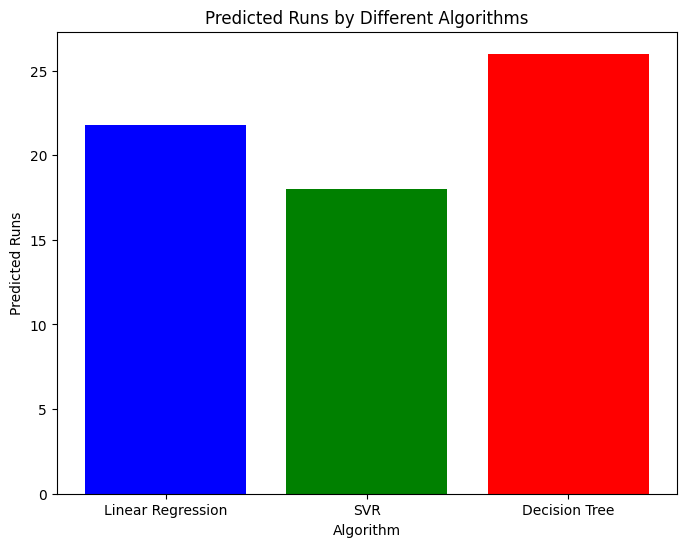

In [65]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = ['Linear Regression', 'SVR', 'Decision Tree']
predicted_runs = [lr_predicted_score[0], svr_predicted_runs[0], dt_predicted_runs[0]]  # Assuming you want to compare predictions for the first data point in new_match_data

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(algorithms, predicted_runs, color=['blue', 'green', 'red'])
plt.xlabel("Algorithm")
plt.ylabel("Predicted Runs")
plt.title("Predicted Runs by Different Algorithms")

plt.show()

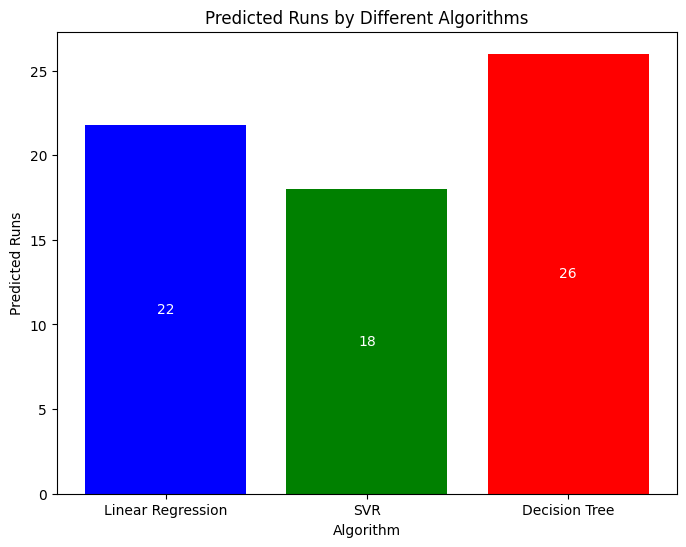

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code) ...

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(algorithms, predicted_runs, color=['blue', 'green', 'red'])
plt.xlabel("Algorithm")
plt.ylabel("Predicted Runs")
plt.title("Predicted Runs by Different Algorithms")

# Add predicted runs as text inside each bar
for bar, run in zip(bars, predicted_runs):
    plt.text(bar.get_x() + bar.get_width() / 2, run / 2,  # Position text inside the bar
             f'{run:.0f}', ha='center', va='center', color='white')  # Center text and set color

plt.show()